####  **第二章**
##### 监督学习--分类与回归



##### 泛化、过拟合、欠拟合
+ 模型适用于未知数据集
+ 过拟合:构建一个对现有信息量来说过于复杂的模型
+ 欠拟合:选择过于简单的模型

In [1]:
import warnings

warnings.filterwarnings('ignore')

import mglearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

x.shape:(26, 2)


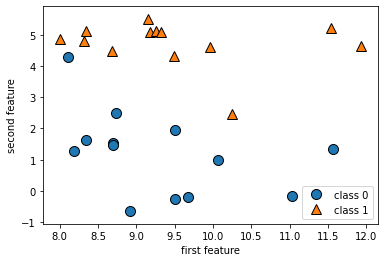

In [2]:
## 生成数据集--模拟分类数据集
X,y = mglearn.datasets.make_forge()
## 数据绘图
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["class 0","class 1"],loc = 4)
plt.xlabel("first feature")
plt.ylabel("second feature")
print("x.shape:{}".format(X.shape))

'\nx 表示特征\ny 表示回归目标\n'

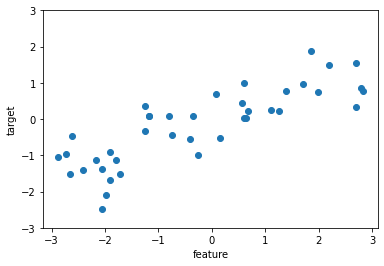

In [3]:
## 生成回归数据集
X,y = mglearn.datasets.make_wave(n_samples = 40)
plt.plot(X,y,"o")
plt.ylim(-3,3)
plt.xlabel("feature")
plt.ylabel("target")
'''
x 表示特征
y 表示回归目标
'''

In [4]:
#### 分类练习数据集 --- 乳腺癌数据集
from sklearn.datasets import load_breast_cancer 
cancer = load_breast_cancer()

In [5]:
### 探究数据
print("shape of cancer data :{} ".format(cancer['data'].shape))
print("sample counts per class :\n{}".format({n : v for n ,v in zip(cancer.target_names,np.bincount(cancer.target))}))

shape of cancer data :(569, 30) 
sample counts per class :
{'malignant': 212, 'benign': 357}


In [6]:
### 回归练习数据 --- 波士顿放假数据集
from sklearn.datasets import load_boston 
boston = load_boston()
print("data shape:{}".format(boston['data'].shape))

X,y=mglearn.datasets.load_extended_boston()
print("X.shape:{}".format(X.shape))


data shape:(506, 13)
X.shape:(506, 104)


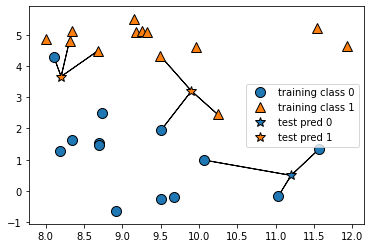

In [7]:
### K近邻算法
mglearn.plots.plot_knn_classification(n_neighbors =3 )

##### sklearn-- 应用K近邻算法

##### **K近邻分类**

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
X,y = mglearn.datasets.make_forge()
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,random_state = 0,test_size=0.3)

In [10]:
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(Xtrain,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [11]:
print("Test set predictions:{}".format(clf.predict(Xtest))) ## 预测结果
print("test set accurary:{:.2f}".format(clf.score(Xtest,ytest)))

Test set predictions:[1 0 1 0 1 0 0 0]
test set accurary:0.88


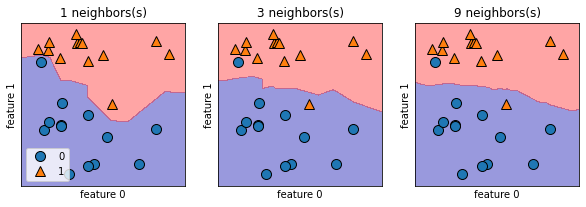

In [12]:
### 可视化
## 查看不同邻居点个数下的决策边界变化
fig,axs = plt.subplots(1,3,figsize=(10,3)) # 创建画布和子图
for n_neighbors,ax in zip([1,3,9],axs):
    clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill = True,eps = 0.5,ax=ax ,alpha = 0.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{} neighbors(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axs[0].legend(loc=3)


In [13]:
## KNN在乳腺癌数据集上的表现

from sklearn.datasets import load_breast_cancer 

cancer = load_breast_cancer()
Xtrain,Xtest,ytrain,ytest = train_test_split(cancer['data'],cancer['target'],random_state=66)

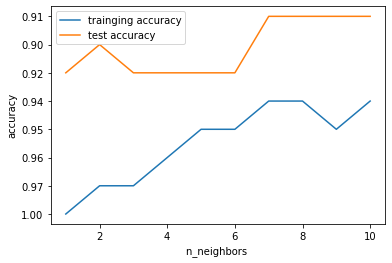

In [14]:
## 创建accuracy存储列表

training_accuracy=[]
test_accuracy = [] 

neighbors_list = range(1,11)
for n_neighbors in neighbors_list:
    # 创建模型
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(Xtrain,ytrain)
    # 记录训练精度
    training_accuracy.append("{:.2f}".format(clf.score(Xtrain,ytrain)))
    test_accuracy.append("{:.2f}".format(clf.score(Xtest,ytest)))

plt.plot(neighbors_list,training_accuracy,label = 'trainging accuracy')
plt.plot(neighbors_list,test_accuracy,label = 'test accuracy')
plt.xlabel("n_neighbors ")
plt.ylabel("accuracy")
plt.legend()

##### **K近邻回归**
+ 使用wave数据（来自本书中的辅助库 mglearn）

In [15]:
from sklearn.neighbors import KNeighborsRegressor ## 导包

In [16]:
X,y = mglearn.datasets.make_wave(n_samples = 40)

In [17]:
## 划分测试集和训练集
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(Xtrain,ytrain)

KNeighborsRegressor(n_neighbors=3)

In [18]:
## 进行简单预测
print("test set prediction:\n{}".format(reg.predict(Xtest)))
print("score of test prediction:{:.2f}".format(reg.score(Xtest,ytest)))

test set prediction:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
score of test prediction:0.83


##### 回归中的score -- R^2
[r^2的解释](https://zh.wikipedia.org/wiki/%E5%86%B3%E5%AE%9A%E7%B3%BB%E6%95%B0)

##### 分析KNeighborsRegressor 
+ 创建一条曲线,设定不同的邻居点 通过KRG来拟合曲线观察效果 

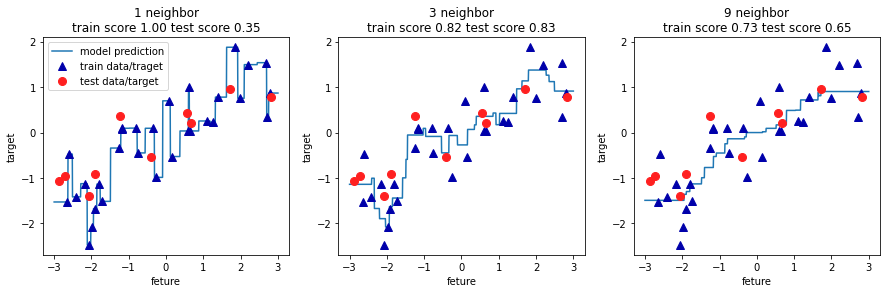

In [19]:
fig,axs = plt.subplots(1,3,figsize = (15,4))
# 通过np 创建一条曲线
line = np.linspace(-3,3,1000).reshape(-1,1)
for neighbors,ax in zip([1,3,9],axs):
    reg = KNeighborsRegressor(n_neighbors = neighbors)
    reg.fit(Xtrain,ytrain)
    ax.plot(line,reg.predict(line))
    ax.plot(Xtrain,ytrain,'^',c=mglearn.cm2(0),markersize = 8)
    ax.plot(Xtest,ytest,'o',c=mglearn.cm2(1),markersize = 8)
    ax.set_title("{} neighbor\ntrain score {:.2f} test score {:.2f}".format(neighbors,reg.score(Xtrain,ytrain),reg.score(Xtest,ytest)))
    ax.set_xlabel("feture")
    ax.set_ylabel("target")
axs[0].legend(['model prediction','train data/traget','test data/target'],loc = 'best')
    



##### 对上述结果的解释
+ 从结果上看,禁用单一邻居,训练集的每一个特点都对预测结果有影响，预测结果的图像经过每个数据点,导致预测结果不稳定
+ 考虑更多邻居后,预测结果更加平滑,但对数据训练的拟合不好

##### K近邻分类器的有点和缺点
+ 优点:易于理解
+ 缺点:处理大数据速度较慢,且不能处理高维数据


#### **线性模型**
##### 线性模型的公式: f(x)=ω1x1+ω2x2+...+ωdxd+b;(b为偏置单元)
+ w(i) 为斜率,b为截距


w[0]: 0.393906  b: -0.031804


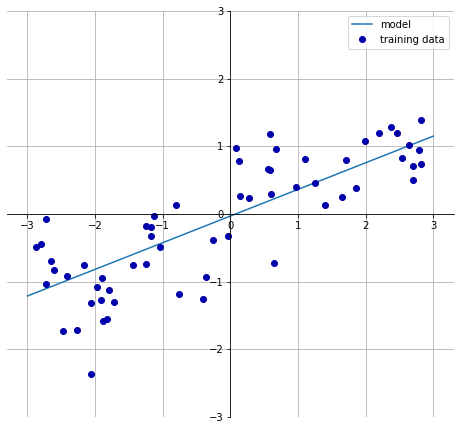

In [20]:
# 一次函数图像
mglearn.plots.plot_linear_regression_wave()

#### 线性回归--- 最小二乘法法回归(回归问题最简单,最经典的线性方法)
##### 线性回归寻找参数w和b,使得对训练集的预测值与真实值的回归目标值y之间的[均方误差](https://zh.wikipedia.org/zh-hans/%E5%9D%87%E6%96%B9%E8%AF%AF%E5%B7%AE) 最小
+ 线性回归没有参数

In [21]:
### 最小二乘法 模拟wave数据集

from sklearn.linear_model import LinearRegression

In [22]:
X,y = mglearn.datasets.make_wave(n_samples= 60)
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,random_state=42)
lr = LinearRegression()
lr.fit(Xtrain,ytrain)

print('coef or lr {}'.format(lr.coef_))
print('intercept {}'.format(lr.intercept_))
print('score of lr {:.2f}'.format(lr.score(Xtrain,ytrain)))

print('score of lr {:.2f}'.format(lr.score(Xtest,ytest)))


coef or lr [0.39390555]
intercept -0.031804343026759746
score of lr 0.67
score of lr 0.66


##### 对上述结果的解释
+ 数据解释:
    + 斜率为:0.3939,截距为:-0.031 训练集分数为:0.67 测试分数为0.66
+ r^2只有0.66 结果不算很好,但是训练分数与测试集分数相近,数据可能存在欠拟合

#####  线性回归在高维数据集上的表现-- 波士顿房价数据集

In [23]:
X,y = mglearn.datasets.load_extended_boston()

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,random_state=0)
lr = LinearRegression().fit(Xtrain,ytrain)

In [24]:
print('coef or lr {}'.format(lr.coef_))
print('intercept {}'.format(lr.intercept_))
print('train score of lr {:.2f}'.format(lr.score(Xtrain,ytrain)))

print('test score of lr {:.2f}'.format(lr.score(Xtest,ytest)))

coef or lr [-4.12710947e+02 -5.22432068e+01 -1.31898815e+02 -1.20041365e+01
 -1.55107129e+01  2.87163342e+01  5.47040992e+01 -4.95346659e+01
  2.65823927e+01  3.70620316e+01 -1.18281674e+01 -1.80581965e+01
 -1.95246830e+01  1.22025403e+01  2.98078144e+03  1.50084257e+03
  1.14187325e+02 -1.69700520e+01  4.09613691e+01 -2.42636646e+01
  5.76157466e+01  1.27812142e+03 -2.23986944e+03  2.22825472e+02
 -2.18201083e+00  4.29960320e+01 -1.33981515e+01 -1.93893485e+01
 -2.57541277e+00 -8.10130128e+01  9.66019367e+00  4.91423718e+00
 -8.12114800e-01 -7.64694179e+00  3.37837099e+01 -1.14464390e+01
  6.85083979e+01 -1.73753604e+01  4.28128204e+01  1.13988209e+00
 -7.72696840e-01  5.68255921e+01  1.42875996e+01  5.39551110e+01
 -3.21709644e+01  1.92709675e+01 -1.38852338e+01  6.06343266e+01
 -1.23153942e+01 -1.20041365e+01 -1.77243899e+01 -3.39868183e+01
  7.08999816e+00 -9.22538241e+00  1.71980268e+01 -1.27718431e+01
 -1.19727581e+01  5.73871915e+01 -1.75331865e+01  4.10103194e+00
  2.93666477e+

#### 训练集和测试集之间的性能差异是过拟合的明显标志
##### **岭回归** -- 线性回归+l2正则化
+ 线性模型处理过拟合的一种手段
##### 岭回归在波士顿房价数据集上的应用



In [25]:
from sklearn.linear_model import Ridge

In [26]:
ridge = Ridge().fit(Xtrain,ytrain)
print("train set score {:.2f}".format(ridge.score(Xtrain,ytrain)))
print("test set score {:.2f}".format(ridge.score(Xtest,ytest)))


train set score 0.89
test set score 0.75


##### 上述过程简单解释
+ Ridge在训练集上的分数要低于线性回归,但在测试上的分数更高,这可以说明线性回归对数据存在过拟合；
- ridge是一种约束性更强的模型,所以不容易过拟合;
+ 复杂度更小的模型在训练集上的性能更差,但泛化性更好，由于我们只对泛化性性能感兴趣,所以应该选择ridge模型而不是线性回归模型;

##### Rigde模型的参数
+ alpha:模型的简单性与训练集性能之间的平衡系数,alpha值越大,w越接近于零,从而减低训练集性能,可能会提高泛化性能,默认为1

In [27]:
## 举例
ridge10 = Ridge(alpha=10).fit(Xtrain,ytrain)
print("train set score {:.2f}".format(ridge10.score(Xtrain,ytrain)))
print("test set score {:.2f}".format(ridge10.score(Xtest,ytest)))

train set score 0.79
test set score 0.64


In [28]:
ridge01 = Ridge(alpha=0.1).fit(Xtrain,ytrain)
print("train set score {:.2f}".format(ridge01.score(Xtrain,ytrain)))
print("test set score {:.2f}".format(ridge01.score(Xtest,ytest)))

train set score 0.93
test set score 0.77


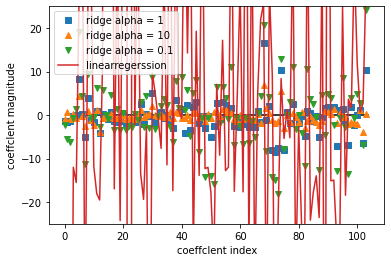

In [29]:
##可以查看alpha在不同取值下的coef_属性,;
plt.plot(ridge.coef_,'s',label = 'ridge alpha = 1')
plt.plot(ridge10.coef_,'^',label = 'ridge alpha = 10')
plt.plot(ridge01.coef_,'v',label = 'ridge alpha = 0.1')

plt.plot(lr.coef_,label='linearregerssion')
plt.xlabel('coeffclent index')
plt.ylabel('coeffclent magnitude')
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()


##### 方法二:固定alpha 改变训练数据来理解正则化的影响
+ 学习曲线:将模型性能作为数据集大小的函数进行绘图，这样的图像叫学习曲线；(？？？ 有点拗口)


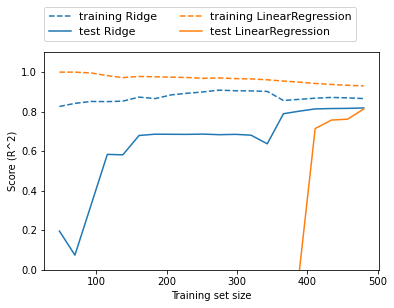

In [30]:
mglearn.plots.plot_ridge_n_samples()

##### ridge和linearregerssion 在boston房价数据集上的小结：
+ 两个模型的训练分数都要高于测试分数
+ 对于上述数据集来书,如果数据点小于400,则线性回归模型学不到任何内容
+ 随着数据点的增多,两个模型的学习能力都在上升,最终线性回归的性能追上岭回归

#### **lasso** -- 使用L1正则化

##### L1 和 L2正则化的区别
+ [L1正则化和L2正则化的区别](https://www.cnblogs.com/zingp/p/10375691.html)

In [31]:
## lasso 在boston房价数据上的应用
from sklearn.linear_model import Lasso

lasso = Lasso().fit(Xtrain,ytrain)
print("train set scroe:{:.2f}".format(lasso.score(Xtrain,ytrain)))
print("test set scroe:{:.2f}".format(lasso.score(Xtest,ytest)))
print('number of feture used :{}'.format(np.sum(lasso.coef_!=0)))

train set scroe:0.29
test set scroe:0.21
number of feture used :4


In [32]:
## lasso 的简单调参，alpha(正则化参数) max_iter(最大迭代次数)

lasso0001 = Lasso(alpha = 0.01,max_iter=100000).fit(Xtrain,ytrain)
print("train set scroe:{:.2f}".format(lasso0001.score(Xtrain,ytrain)))
print("test set scroe:{:.2f}".format(lasso0001.score(Xtest,ytest)))
print('number of feture used :{}'.format(np.sum(lasso0001.coef_!=0)))

lasso001 = Lasso(alpha = 0.0001,max_iter=100000).fit(Xtrain,ytrain)
print("train set scroe:{:.2f}".format(lasso0001.score(Xtrain,ytrain)))
print("test set scroe:{:.2f}".format(lasso0001.score(Xtest,ytest)))
print('number of feture used :{}'.format(np.sum(lasso001.coef_!=0)))

train set scroe:0.90
test set scroe:0.77
number of feture used :33
train set scroe:0.90
test set scroe:0.77
number of feture used :96


(-25.0, 25.0)

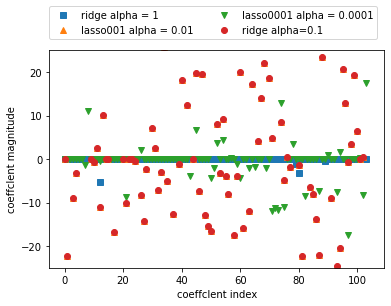

In [33]:
plt.plot(lasso.coef_,'s',label = 'ridge alpha = 1')
plt.plot(lasso001.coef_,'^',label = 'lasso001 alpha = 0.01')
plt.plot(lasso0001.coef_,'v',label = 'lasso0001 alpha = 0.0001')

plt.plot(lasso001.coef_,'o',label='ridge alpha=0.1')
plt.legend(ncol=2,loc=(0,1.05))
plt.xlabel('coeffclent index')
plt.ylabel('coeffclent magnitude')
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)


##### 不同alpha值的lasso回归于岭回归
+ 在alpha = 1时,回归方程的大部分系数都是零,其他系数也都很小,将alpha减小至0.01,大部分特征依旧为零,在alpha = 0.001是,模型对正则化的惩罚很弱,此时大部分系数都不为零；

##### lasso 和 ridge的选择
+ **一般**首选岭回归,但特征很多,可以选择lasso
+ lasso是一个可解释性很好的模型

##### 用于分类的线性模型
+ 公式:f(x)=ω[0]x[0]+ω[1]x[1]+...+ω[p]x[p]+b>0

##### **分类算法的简单概述:**
+ 分类的线性模型,决策边界是输入的线性函数;

##### **分类算法区别:**
+ 系数和截距的特定组合对训练数据拟合好坏的度量方法--损失函数的选择
+ 是否使用正则化,以及使用那种正则化方法

In [34]:
## 简单体验--logisticRegression和linearSVC
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import LinearSVC

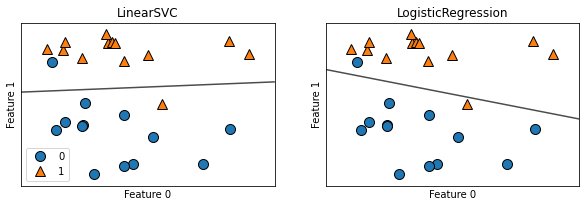

In [35]:
X ,y =mglearn.datasets.make_forge()

fig,axes = plt.subplots(1,2,figsize=(10,3))
for model ,ax in zip([LinearSVC(),LogisticRegression()],axes):
    clf=model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=False,eps = 0.5,ax=ax,alpha = 0.7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

axes[0].legend()

##### 对于logisticregression和linarsvc来说；
+ 决定正则化强度的权衡参数叫c,c值越大,对应的正则化越弱,即如果c值较大,那么logisticregression和linearsvc将尽可能将训练集拟合到最好,而如果c值较小,那么模型更强调使系数向量(w)接近于0
+ 参数c的另一个用处,可以让算法尽量适应“大多数的数据点”

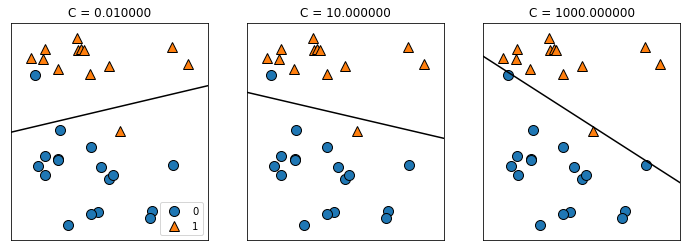

In [36]:
## 例
mglearn.plots.plot_linear_svc_regularization()

#####  逻辑回归在乳腺癌数据上的应用：

In [37]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [38]:
Xtrain,Xtest,ytrain,ytest =train_test_split(cancer.data,cancer.target,stratify = cancer.target,random_state=42)
logreg= LogisticRegression()
logreg.fit(Xtrain,ytrain)
print("train set score:{:.3f}".format(logreg.score(Xtrain,ytrain)))
print("test set score :{:.3f}".format(logreg.score(Xtest,ytest)))

train set score:0.946
test set score :0.965


In [39]:
logreg100= LogisticRegression(C=100)
logreg100.fit(Xtrain,ytrain)
print("train set score:{:.3f}".format(logreg100.score(Xtrain,ytrain)))
print("test set score :{:.3f}".format(logreg100.score(Xtest,ytest)))

train set score:0.955
test set score :0.951


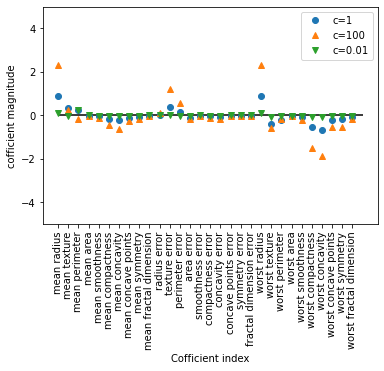

In [40]:
### 不同c值下 模型学到的系数
plt.plot(LogisticRegression(C=1).fit(Xtrain,ytrain).coef_.T,'o',label="c=1")
plt.plot(LogisticRegression(C=100).fit(Xtrain,ytrain).coef_.T,'^',label="c=100")
plt.plot(LogisticRegression(C=0.01).fit(Xtrain,ytrain).coef_.T,'v',label="c=0.01")

plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("Cofficient index")
plt.ylabel('cofficient magnitude')
plt.legend()

##### 对上述过程的小结：
+ logisticregression 默认使用l2正则化(可通过参数penalty 来改变正则化方式)
+ 更强的正则化可以使系数趋近于零但不会等于零
+ 可解释性 -- 根据上图了解到,其结果与ridge类似,更强的正则化系数是的系数更趋近于0,单系数永远不会正好等于0

train accuracy of l1 logreg with C= 0.001:0.91 
test accuracy of l1 logreg with C=0.001:0.92
train accuracy of l1 logreg with C= 1.000:0.96 
test accuracy of l1 logreg with C=1.000:0.96
train accuracy of l1 logreg with C= 100.000:0.99 
test accuracy of l1 logreg with C=100.000:0.98


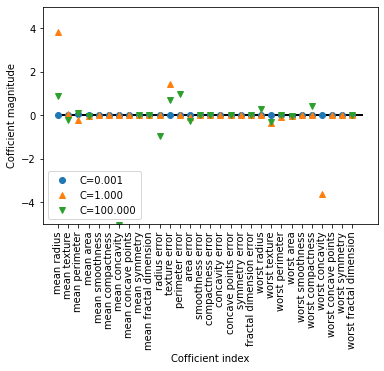

In [41]:
## 使用L1正则化的逻辑回归
for C,marker in zip([0.001,1,100],['o','^','v']):
    lr_l1=LogisticRegression(C=C,penalty='l1', solver='liblinear').fit(Xtrain,ytrain)
    print("train accuracy of l1 logreg with C= {:.3f}:{:.2f} ".format(C,lr_l1.score(Xtrain,ytrain)))
    print("test accuracy of l1 logreg with C={:.3f}:{:.2f}".format(C,lr_l1.score(Xtest,ytest)))

    plt.plot(lr_l1.coef_.T,marker,label='C={:.3f}'.format(C))
    plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation = 90)
    plt.hlines(0,0,cancer.data.shape[1])
    plt.xlabel("Cofficient index")
    plt.ylabel("Cofficient magnitude")
    plt.ylim(-5,5)
    plt.legend(loc=3)


#### 多分类问题
+ 将二分类算法推广到多分类算法的常见方法: 一对其余,对每个类别进行二分类判别

In [42]:
### 线性模型在三分类上的应用

#### 应用数据集--二维数据，服从高斯分布

In [43]:
from sklearn.datasets import make_blobs
X,y = make_blobs(random_state = 42)

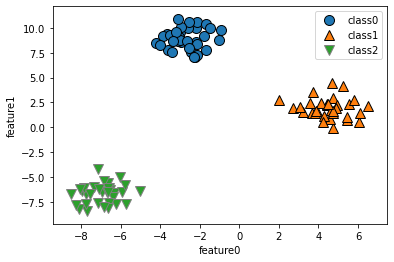

In [44]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("feature0")
plt.ylabel("feature1")
plt.legend(["class0","class1","class2"])

In [45]:
linear_svm = LinearSVC().fit(X,y)
print("Coefficient shape:",linear_svm.coef_.shape) # 返回系数矩阵
print("Intercept shape:",linear_svm.intercept_.shape) # 返回截距矩阵

Coefficient shape: (3, 2)
Intercept shape: (3,)


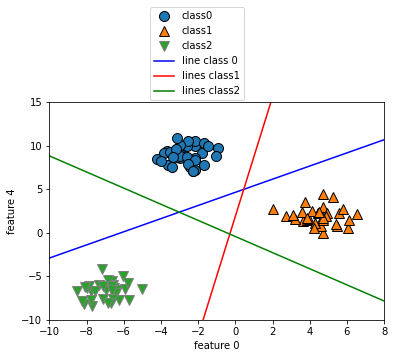

In [46]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef,intercept ,color in zip(linear_svm.coef_,linear_svm.intercept_,['b','r','g']):
    plt.plot(line,-(line*coef[0]+intercept)/coef[1],color)
    plt.ylim(-10,15)
    plt.xlim(-10,8)
    plt.xlabel("feature 0")
    plt.ylabel('feature 4')
    plt.legend(["class0","class1","class2","line class 0",'lines class1','lines class2'],loc={1.01,0.3})

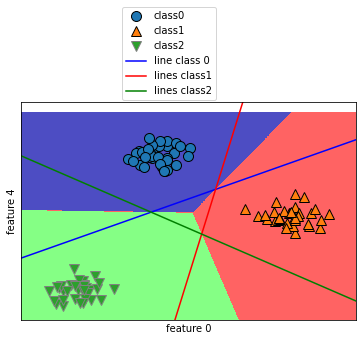

In [47]:
mglearn.plots.plot_2d_classification(linear_svm,X,fill=True,alpha = 0.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef,intercept ,color in zip(linear_svm.coef_,linear_svm.intercept_,['b','r','g']):
    plt.plot(line,-(line*coef[0]+intercept)/coef[1],color)
    plt.ylim(-10,15)
    plt.xlim(-10,8)
    plt.xlabel("feature 0")
    plt.ylabel('feature 4')
    plt.legend(["class0","class1","class2","line class 0",'lines class1','lines class2'],loc={1.01,0.3})

##### 线性分类模型小结
+ 线性模型的主要参数正则化参数,在回归中叫做alpha,在分类中叫C,alpha 或者C值较大说明模型比较简单;
+ 正则化化方式:l1正则化和l2正则化
    + 如果确定特征的重要性,可优先使用l1正则化,否则默认使用l2正则化
    + 如果模型的可解释重要的话,使用l1也会有帮助的
+ 线性模型的优点:
    + 训练速度快
    + 如果特征数量大于样本数量,线性模型的表现会非常好

##### 朴素贝叶斯分类器
+ 可用于文本分类（伯努利或者朴素贝叶斯）

In [48]:
x = np.array([[0,1,0,1],
            [1,0,1,1],
            [0,0,0,1],
            [1,0,1,0]])
y=np.array([0,1,0,1])

In [49]:
x

array([[0, 1, 0, 1],
       [1, 0, 1, 1],
       [0, 0, 0, 1],
       [1, 0, 1, 0]])

In [50]:
counts = {}
for label in np.unique(y):
    counts[label] =x[y==label].sum(axis=0)
print("feature name:\n{}".format(counts))

feature name:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


##### 贝叶斯的优点、缺点和参数
+ 参数MultinomialNB和BernorlloNB都只有一个参数alpha,用于控制模型复杂度
    + alpha的工作原理: 算法向数据中添加alpha这么多的虚拟数据点,这些点对所有特征都去正值,这可以将统计数据"平滑化".alpha越大,平滑性越强,模型复杂度越低
    + 算法性能对alpha值的鲁棒性相对较好,即alpha值对模型的性能并不重要,但调整这个参数通常回事精度略有提高
+ 三种贝叶斯的应用:
    + GaussianNB主要用于高维数据,另外两种广泛应用于稀疏计数数据
    + MultinomialNB的性能通常优于BernoulliNB,特别是在包含很多非零特征的数据集上(即大型文本)
+ 优点和缺点:
    + 训练和预测速度都很快,训练过程也很容易理解
    + 模型对高维稀疏数据的效果很好
    

##### 决策树在乳腺癌数据上的应用

In [51]:
from sklearn.tree import DecisionTreeClassifier 

cancer = load_breast_cancer()
Xtrain ,Xtest,ytrain,ytest = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(Xtrain,ytrain)
print("accuracy on train set:{:.3f}".format(tree.score(Xtrain,ytrain)))
print("accauracy on test set :{:.3f}".format(tree.score(Xtest,ytest)))

accuracy on train set:1.000
accauracy on test set :0.937


In [52]:
### 精度100%产生的原因：因为根节点是纯的且数的深度很大足以完美的记住训练数据的所有标签
### 如果我们不限制决策树的深度，他的深度和复杂度都可以变得非常大，容易产生过拟合


##### 控制树模型复杂度方法
+ 预剪枝:通过规定一个节点节点中的数据个数来防止自动划分
+ 控制树的深度- 参数：max_depth 

In [53]:
cancer = load_breast_cancer()
Xtrain ,Xtest,ytrain,ytest = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)
tree = DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(Xtrain,ytrain)
print("accuracy on train set:{:.3f}".format(tree.score(Xtrain,ytrain)))
print("accauracy on test set :{:.3f}".format(tree.score(Xtest,ytest)))

accuracy on train set:0.988
accauracy on test set :0.951


In [54]:
##### 树的可视化
from sklearn.tree import export_graphviz

In [55]:
export_graphviz(tree,out_file="tree_dot",class_names=['malignant','begign'],feature_names = cancer.feature_names,impurity=False,filled=True)

In [56]:
#### 查看特征的重要性 attribute  = clf.feature_importances
print(tree.feature_importances_)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


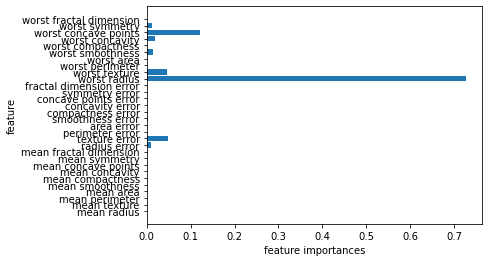

In [57]:
##### 特征重要性可视化
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel("feature importances")
    plt.ylabel("feature")
    

plot_feature_importances_cancer(tree)

In [58]:
#### 决策回归树
# 注意事项：在使用树模型和其他基于树的回归模型是，不能外推，也不能在训练数据范围之外进行预测（？？？）

##### 决策树的优点和缺点
+ 模型易可视化
+ 模型不受数据缩放影响

+ 树模型泛化性差,容易过拟合

##### 决策树的集成
+ 集成(ensemble) 是合并多个机器学习模型来构建更强大的学习模型的方法;


##### 随机森林和梯度提升树

##### 随机森林---可以解决决策树对训练数据的过拟合
+ 随机森林的参数
    + n_estimators:树的个数
    + max_features:控制树的相似性 决定每棵树的随机性大小
    + max_depth ： 控制的数的深度

In [59]:
#### 随机森林在月亮型数据上的应用

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

In [60]:
X,y = make_moons(n_samples = 100,noise=0.25,random_state = 3)
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,stratify = y,random_state = 42)

In [61]:
forest = RandomForestClassifier(n_estimators = 5,random_state = 2)
forest.fit(Xtrain,ytrain)

RandomForestClassifier(n_estimators=5, random_state=2)

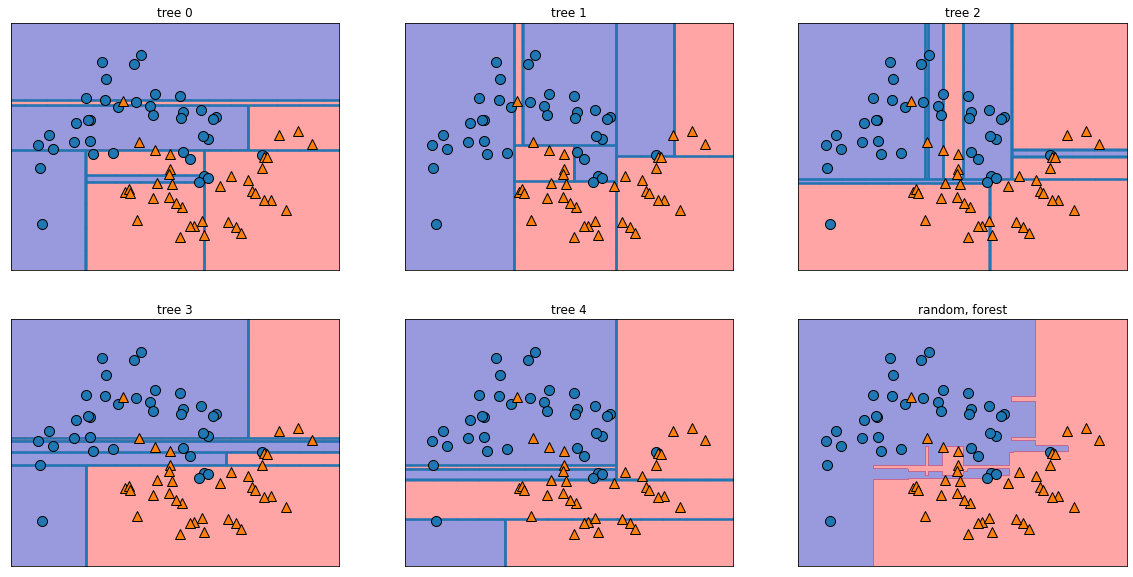

In [62]:
fig ,axes = plt.subplots(2,3,figsize=(20,10))
for i ,(ax,tree) in enumerate(zip(axes.ravel(),forest.estimators_)):
    ax.set_title("tree {}".format(i))
    mglearn.plots.plot_tree_partition(Xtrain,ytrain,tree,ax=ax)

    
mglearn.plots.plot_2d_separator(forest,Xtrain,fill =True,ax=axes[-1,-1],alpha =0.4)
axes[-1,-1] .set_title("random, forest")

mglearn.discrete_scatter(Xtrain[:,0],Xtrain[:,1],ytrain)
    
    
    

In [63]:
Xtrain,Xtest,ytrain,ytest=train_test_split(cancer['data'],cancer['target'],random_state = 0)
forest = RandomForestClassifier(n_estimators = 100,random_state = 0)
forest.fit(Xtrain,ytrain)

print("accuracy on training  set: {:.3f}".format(forest.score(Xtrain,ytrain)))
print("accuracy on test set: {:.3f}".format(forest.score(Xtest,ytest)))

accuracy on training  set: 1.000
accuracy on test set: 0.972


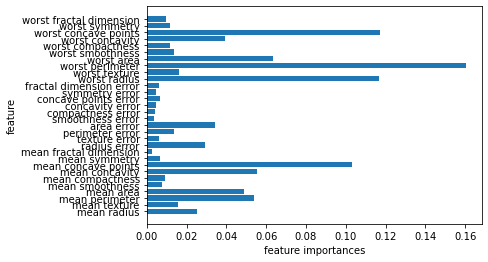

In [64]:
plot_feature_importances_cancer(forest)

##### 随机森林的有点的和缺点
+ 优点：
    + 方法强大;不需要反复调节参数就可以给出很好的结果，也**不需要对数据进行缩放**
+ 缺点：
    + 比较耗费时间

##### 梯度提升回归树(梯度提升机) 
+ 梯度提升回归树:通过**合并**多个决策树来构建一个更为强大的模型,可以用作回归和分类;
    + 建模过程：区别于随机森林,梯度提升采用连续的方式构造数,每棵树都试图纠正前一个数的错误.默认情况下，梯度提升回归树没有随机化,而是用到强预剪枝
    + 梯度提升树通常使用深度很小(1~5之间)的树,这样使得模型占用的内存更小,预测速度更快;

In [65]:
from sklearn.ensemble import GradientBoostingClassifier as gbc

In [66]:
Xtrain,Xtest,ytrain,ytest = train_test_split(cancer['data'],cancer['target'],random_state = 0)

gbrt = gbc(random_state = 0)
gbrt.fit(Xtrain,ytrain)

print("accuracy on training  set: {:.3f}".format(gbrt.score(Xtrain,ytrain)))
print("accuracy on test set: {:.3f}".format(gbrt.score(Xtest,ytest)))

accuracy on training  set: 1.000
accuracy on test set: 0.965


In [67]:
gbrt = gbc(random_state = 0,max_depth = 1)
gbrt.fit(Xtrain,ytrain)

print("accuracy on training  set: {:.3f}".format(gbrt.score(Xtrain,ytrain)))
print("accuracy on test set: {:.3f}".format(gbrt.score(Xtest,ytest)))

accuracy on training  set: 0.991
accuracy on test set: 0.972


In [68]:
gbrt = gbc(random_state = 0,learning_rate=0.01)
gbrt.fit(Xtrain,ytrain)

print("accuracy on training  set: {:.3f}".format(gbrt.score(Xtrain,ytrain)))
print("accuracy on test set: {:.3f}".format(gbrt.score(Xtest,ytest)))

accuracy on training  set: 0.988
accuracy on test set: 0.965


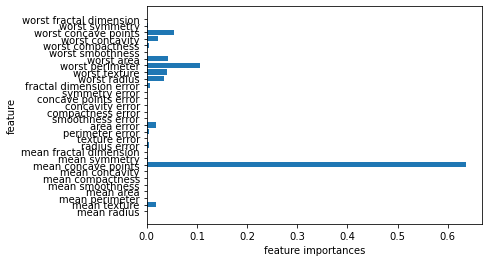

In [69]:
plot_feature_importances_cancer(gbrt)

##### **核支持向量机**
+ 线性模型和非线性特征:线性模型在低维空间使用非常受限,因为线和平面的灵活性有限,添加更多特征可以使线性模型更加灵活

In [70]:
X,y = make_blobs(centers = 4,random_state = 8)
y=y%2

Text(0, 0.5, 'feature 1')

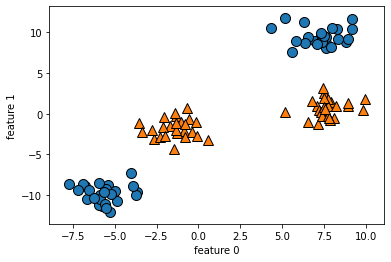

In [71]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

Text(0, 0.5, 'feature 1')

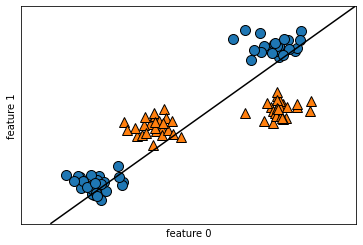

In [72]:
from sklearn.svm import LinearSVC 
linear_svc = LinearSVC().fit(X,y)

mglearn.plots.plot_2d_separator(linear_svc,X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

Text(0.5, 0, 'feature1**2')

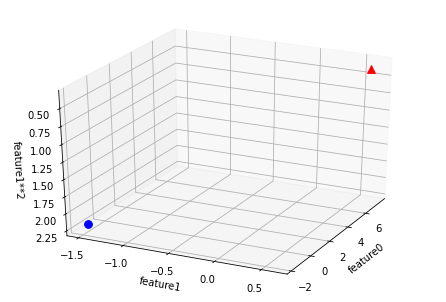

In [73]:
X_new = np.hstack([X,X[:,1:]**2])

from mpl_toolkits.mplot3d import Axes3D,axes3d

figure = plt.figure()
# 3d可视化
ax = Axes3D(figure,elev = -152,azim=-26)

# 首先画出y==0得点,然后在画出y==1的点
mask =y = 0
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c='b',cmap = mglearn.cm2,s = 60)
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',cmap = mglearn.cm2,s = 60,marker='^')



ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1**2")



Text(0.5, 0, 'feature1**2')

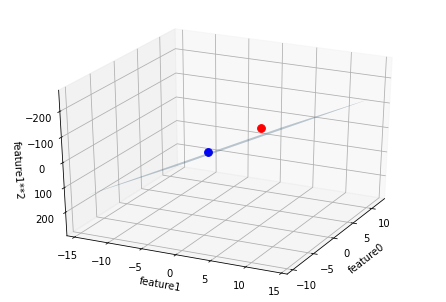

In [74]:
### 这里画出来的图和书上的不太一样

X,y_ = make_blobs(centers = 4,random_state = 8)
X_new = np.hstack([X,X[:,1:]**2])
linear_svm_3d = LinearSVC().fit(X_new,y_)
coef,intercept = linear_svm_3d.coef_.ravel(),linear_svm_3d.intercept_

# 显示决策边界
figure = plt.figure()
ax = Axes3D(figure,elev = -152,azim=-26)
xx = np.linspace(X_new[:,0].min()-2,X_new[:,0].max()+2,50)
yy = np.linspace(X_new[:,1].min()-2,X_new[:,1].max()+2,50)

XX ,YY = np.meshgrid(xx,yy)
ZZ = (coef[0]*XX + coef[1]*YY ) / -coef[2]

ax.plot_surface(XX,YY,ZZ,rstride=8,cstride = 8,alpha = 0.3)
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c='b',cmap = mglearn.cm2 ,s = 60)
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',cmap = mglearn.cm2 ,s = 60)

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1**2")

In [75]:
### -- 待处理
# ZZ = YY**2
# dec = linear_svm_3d.decision_function(np.c_[XX.ravel(),YY.ravel(),ZZ.ravel()])
# plt.contourf(XX,YY,dec.reshape(XX.shape),level = [dec.min(),0,dec.max()],cmap = mglearn.cm2,alpha = 0.5)
# mglearn.discrete_scatter(X[:,0],X[:,1],y)
# plt.xlabel("feature0")
# plt.ylabel("feature1")                                                

##### 核技巧
+ 向数据中添加非线性特征，可以让模型变得更强大
+ 支持向量机常用方法:
 + 选择多项式核:
 + 选择高斯核:

##### 理解SVM
+ 在训练过程中,SVM学习每个训练数据点对于表示两个类别之间的决策边界的重要性,通常只有一部分训练数据点对于定义决策边界来说很重要:位于类别之间边界上的那些点.这些点叫做支持向量(support vector);
+ 对新样本的预测,需要测量它与每个支持向量之间的距离,分类决策是基于它与支持向量之间的距离以及在训练过程中学到的支持向量的重要性(保存在SVC的dual_coef_属性中)来做出来的 ;
+ 数据点之间的距离由高斯核给出: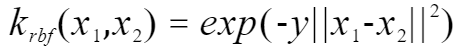，其中x1,x2为数据点，||x1-x2||表示欧式距离,y(gamma)是控制高斯核宽度的参数;

Text(0, 0.5, 'feature 1')

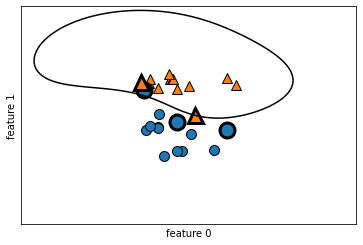

In [76]:
## 例： 支持向量机在二分类上的应用
from sklearn.svm import SVC
X,y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel = 'rbf',C=10,gamma = 0.1).fit(X,y)

mglearn.plots.plot_2d_separator(svm,X,eps = 5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)

#画出支持向量
sv = svm.support_vectors_

# 支持向量的类别有dual_coef_的正负号给出
sv_labels = svm.dual_coef_.ravel()>0
mglearn.discrete_scatter(sv[:,0],sv[:,1],sv_labels,s=15,markeredgewidth = 3)
plt.xlabel("feature 0")
plt.ylabel("feature 1")


##### svm 调参
+ gamma 用于控制高斯核的宽度，决定了点与点之间 ,gamma越小 高斯核半径越大
+ C 正则化参数 与线性模型类似，它限制每个点的重要性(或者数，每个点的dual_coef_)
+ 默认情况下C=1 gamma = 1/n_feature
+ 核svm受特征量纲影响
    + 解决方法：缩放处理
   

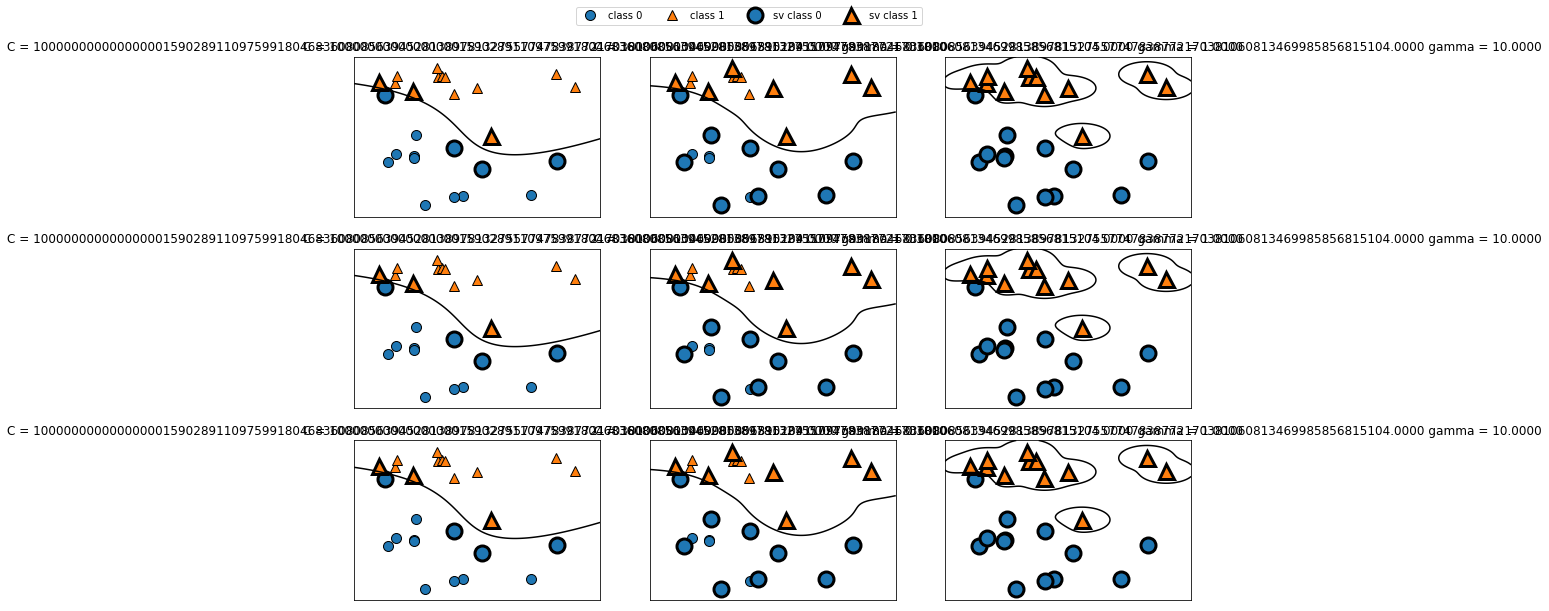

In [77]:
fig,axes = plt.subplots(3,3,figsize=(15,10))

for ax ,c in zip(axes,[-1,0,3]):
    for a,gamma in zip(ax,range(-1,2)):
        mglearn.plots.plot_svm(log_C=C,log_gamma=gamma,ax=a)
        
axes[0,0].legend(["class 0","class 1","sv class 0","sv class 1"],ncol = 4,loc = (0.9,1.2))        

In [78]:
##### rbf核在乳腺癌数据集上的应用
Xtrain,Xtest,ytrain,ytest= train_test_split(cancer['data'],cancer['target'],random_state = 0)
svc = SVC()
svc.fit(Xtrain,ytrain)

print("accuracy on training set:{:.2f}".format(svc.score(Xtrain,ytrain)))
print("accuracy on test set:{:.2f}".format(svc.score(Xtest,ytest)))


accuracy on training set:0.90
accuracy on test set:0.94


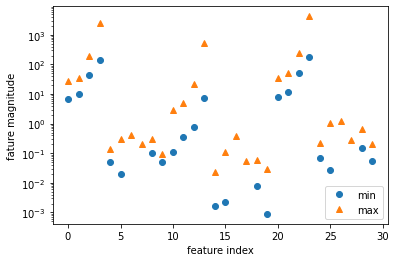

In [79]:
plt.plot(Xtrain.min(axis=0),"o",label = "min")
plt.plot(Xtrain.max(axis=0),"^",label = "max")
plt.legend(loc=4)
plt.xlabel("feature index")
plt.ylabel("fature magnitude")
plt.yscale("log")

In [80]:
### 缩放
#计算训练集中每个特征的最小值
min_on_train = Xtrain.min(axis=0)
# 计算训练集中每个特征的范围
range_on_train = (Xtrain-min_on_train).max(axis=0)
# 减去最小值,然后除以范围
Xtrain_sacled = (Xtrain - min_on_train)/range_on_train
print("Minmum for each feature\n{}".format(Xtrain_sacled.min(axis=0)))
print("Maxmum for each feature\n{}".format(Xtrain_sacled.max(axis=0)))

Minmum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maxmum for each feature
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [81]:
# 利用训练集的最小值和范围对测试集进行相同的变换
Xtest_scaled = (Xtest-min_on_train)/range_on_train

svc = SVC()
svc.fit(Xtrain_sacled,ytrain)

print("accuracy on train set:{:.3f}".format(svc.score(Xtrain_sacled,ytrain)))
print("accuracy on test set:{:.3f}".format(svc.score(Xtest_scaled,ytest)))

accuracy on train set:0.984
accuracy on test set:0.972


In [82]:
Xtest_scaled = (Xtest-min_on_train)/range_on_train

svc = SVC(C=1000)
svc.fit(Xtrain_sacled,ytrain)

print("accuracy on train set:{:.3f}".format(svc.score(Xtrain_sacled,ytrain)))
print("accuracy on test set:{:.3f}".format(svc.score(Xtest_scaled,ytest)))

accuracy on train set:1.000
accuracy on test set:0.958


##### svm的优点和缺点
+ 优点:
    + svm 允许决策边界很复杂,及时数据只有几个特征,它在数据特征数据和高维数据上的表现都很好,但对样本个数缩放表现不好;
+ 缺点:
    + 数据预处理和调参都要非常小心
    + 可解释性差

#### 神经网络(深度学习)
 + 多层感知机（mlp）
+ 神经网络模型
 + mlp 可以被视为广义的线性模型,执行多层处理后得到结论;
 + 在mlp中，多次重复这个计算加权求和的过程,首先计算爱表中间过程的隐单元,然后在计算这些隐单元的加权求和并得到结果

Text(0, 0.5, 'relu(x),tanh(x)')

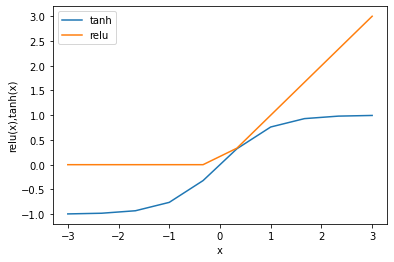

In [97]:
line = np.linspace(-3,3,10)
plt.plot(line,np.tanh(line),label = "tanh")
plt.plot(line,np.maximum(line,0),label = 'relu')
plt.legend(loc = 'best')
plt.xlabel("x")
plt.ylabel("relu(x),tanh(x)")

Text(0, 0.5, 'feature 1')

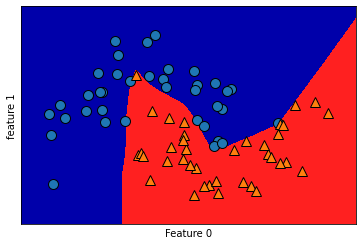

In [101]:
## 神经网络在月亮型数据集上的医用
from sklearn.neural_network import MLPClassifier 
from sklearn.datasets import make_moons 

X,y = make_moons(n_samples = 100,noise = 0.25,random_state = 3)
Xtrain ,Xtest,ytrain,ytest = train_test_split(X,y,stratify = y,random_state =42 )

mlp = MLPClassifier(solver = 'lbfgs',random_state = 0).fit(Xtrain,ytrain)
mglearn.plots.plot_2d_separator(mlp,Xtrain,fill=True)
mglearn.discrete_scatter(Xtrain[:,0],Xtrain[:,-1],ytrain)
plt.xlabel("Feature 0")
plt.ylabel("feature 1")

## 默认情况下 mlp使用100个隐节点，可通过hidden_layer_sizes = [int] 控制隐单元的使用数量,列表长度控制层数


Text(0, 0.5, 'feature 1')

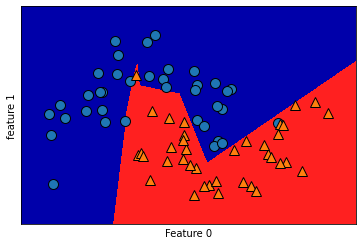

In [103]:
mlp = MLPClassifier(solver = 'lbfgs',random_state = 0,hidden_layer_sizes = [10]).fit(Xtrain,ytrain)
mglearn.plots.plot_2d_separator(mlp,Xtrain,fill=True)
mglearn.discrete_scatter(Xtrain[:,0],Xtrain[:,-1],ytrain)
plt.xlabel("Feature 0")
plt.ylabel("feature 1")

Text(0, 0.5, 'feature 1')

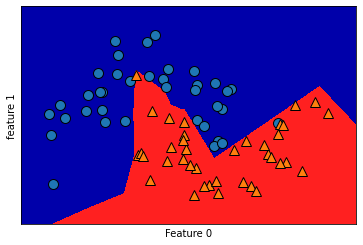

In [105]:
mlp = MLPClassifier(solver = 'lbfgs',activation='relu',random_state = 0,hidden_layer_sizes = [10,10]).fit(Xtrain,ytrain)
mglearn.plots.plot_2d_separator(mlp,Xtrain,fill=True)
mglearn.discrete_scatter(Xtrain[:,0],Xtrain[:,-1],ytrain)
plt.xlabel("Feature 0")
plt.ylabel("feature 1")

Text(0, 0.5, 'feature 1')

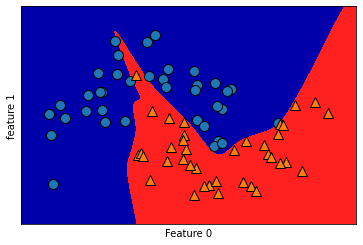

In [106]:
mlp = MLPClassifier(solver = 'lbfgs',activation='tanh',random_state = 0,hidden_layer_sizes = [10,10]).fit(Xtrain,ytrain)
mglearn.plots.plot_2d_separator(mlp,Xtrain,fill=True)
mglearn.discrete_scatter(Xtrain[:,0],Xtrain[:,-1],ytrain)
plt.xlabel("Feature 0")
plt.ylabel("feature 1")

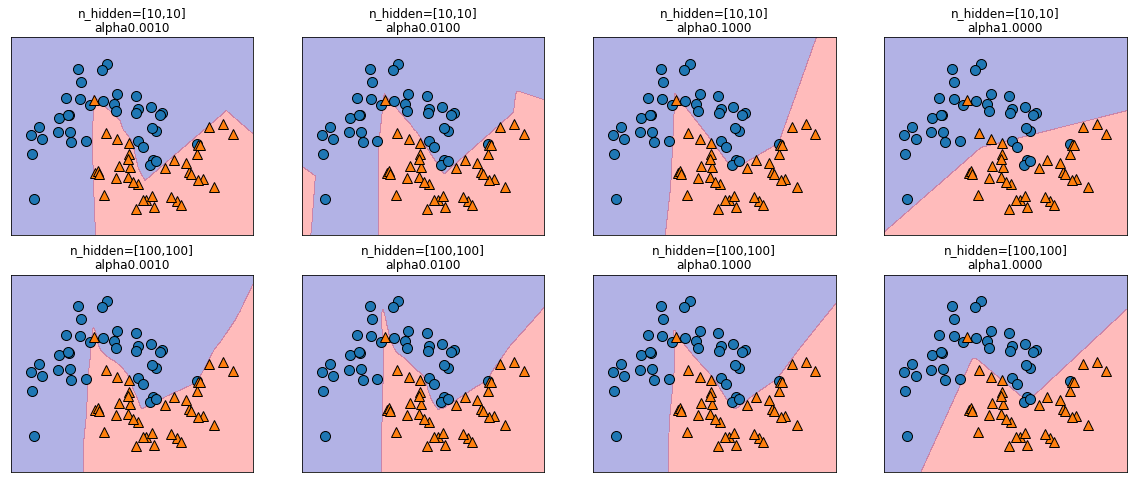

In [113]:
##### MLP使用L2惩罚, shiyong alpha 控制正则化
fig,axes = plt.subplots(2,4,figsize=(20,8))
for axx,n_hidden_nodes in zip(axes,[10,100]):
    for ax,alpha in zip(axx,[0.001,0.01,0.1,1]):
        mlp = MLPClassifier(solver='lbfgs',random_state = 0,hidden_layer_sizes=[n_hidden_nodes,n_hidden_nodes],alpha = alpha)
        mlp.fit(Xtrain,ytrain)
        mglearn.plots.plot_2d_separator(mlp,Xtrain,fill = True ,alpha=.3,ax=ax)
        mglearn.discrete_scatter(Xtrain[:,0],Xtrain[:,-1],ytrain,ax=ax)
        ax.set_title("n_hidden=[{},{}]\nalpha{:.4f}".format(n_hidden_nodes,n_hidden_nodes,alpha))

In [117]:
##### 控制神经网络复杂度的方法,
# 隐层的个数,每个隐层中的单元数,正则化 ，
# 开始学习之前其权重是随机设置的,初始化会影响学到的模型,(对大网络影响不大)

Cancer data per-featrue maxima:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


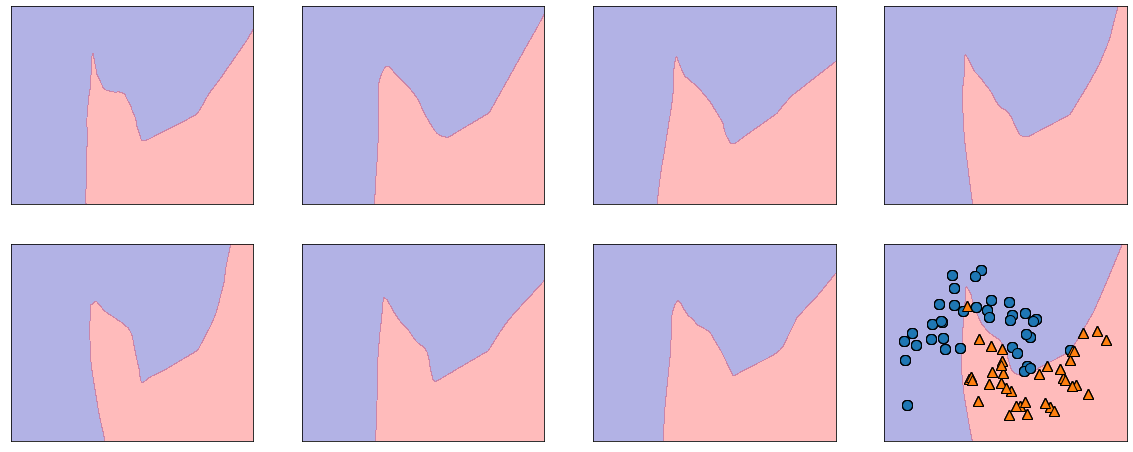

In [123]:
X,y = make_moons(n_samples = 100,noise = 0.25,random_state = 3)
Xtrain ,Xtest,ytrain,ytest = train_test_split(X,y,stratify = y,random_state =42 )
fig ,axes = plt.subplots(2,4,figsize=(20,8))
for i , ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver = 'lbfgs',random_state = i,hidden_layer_sizes=[100,100])
    mlp.fit(Xtrain,ytrain)
    mglearn.plots.plot_2d_separator(mlp,Xtrain,fill=True,alpha=0.3,ax=ax )
    mglearn.discrete_scatter(Xtrain[:,0],Xtrain[:,1],ytrain)
print("Cancer data per-featrue maxima:\n{}".format(cancer['data'].max(axis=0)))

In [128]:
Xtrain,Xtest,ytrain,ytest = train_test_split(cancer['data'],cancer['target'],random_state=0)
mlp = MLPClassifier(random_state = 42)
mlp.fit(Xtrain,ytrain)

print("Accuracy on train set:{:.2f}".format(mlp.score(Xtrain,ytrain)))
print("Accuracy on test set:{:.2f}".format(mlp.score(Xtest,ytest)))


Accuracy on train set:0.94
Accuracy on test set:0.92


In [135]:
#### 神经网络要求所有输入特征的变化范围相似,最理想的情况是均值为零,方差为1，
## 实现过程 
# 计算每个特征特征的均值
mean_on_train = Xtrain.mean(axis=0)
# 计算训练集中每个特征标准差
std_on_train = Xtrain.std(axis = 0)

# 减去平均值，然后乘以标准差的倒数
# 如此运算之后mean = 0 std = 1 
Xtrain_scaled = (Xtrain-mean_on_train)/std_on_train
mlp.fit(Xtrain_scaled,ytrain)

mean_on_test = Xtest.mean(axis=0)
# 计算训练集中每个特征标准差
std_on_test = Xtest.std(axis = 0)

# 减去平均值，然后乘以标准差的倒数
# 如此运算之后mean = 0 std = 1 
Xtest_scaled = (Xtest-mean_on_test)/std_on_test

print("Accuracy on train set:{:.3f}".format(mlp.score(Xtrain_scaled,ytrain)))
print("Accuracy on test set:{:.3f}".format(mlp.score(Xtest_scaled,ytest)))

Accuracy on train set:0.993
Accuracy on test set:0.958


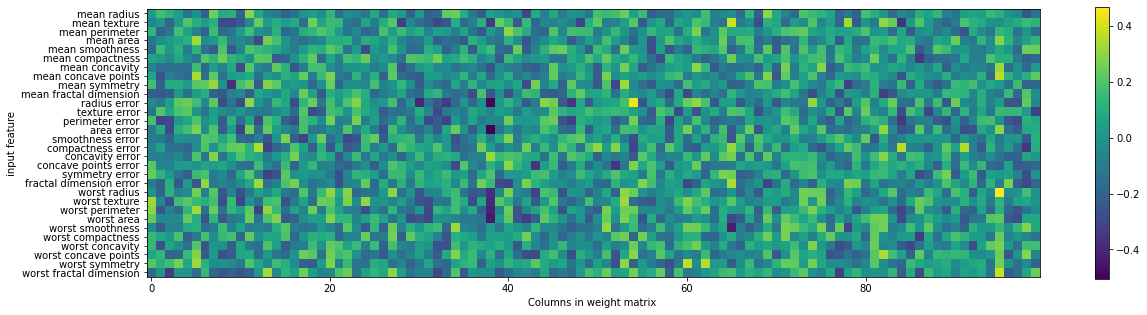

In [138]:
#### 
plt.figure(figsize = [20,5])
plt.imshow(mlp.coefs_[0],interpolation="none",cmap = "viridis")
plt.yticks(range(30),cancer.feature_names)
plt.xlabel("Columns in weight matrix ")
plt.ylabel("input feature")
plt.colorbar()

##### 神经网络的优点和缺点
+ 优点:
    + 功能强大
    + 能够获得大量数据包含的信息
    + 神经网络的复杂度

##### 分类器的不确定度估计
+ decision_function 和 predict_proba

In [150]:
##### 在梯度提升树应用上述方法
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.datasets import make_circles

X,y=make_circles(noise = 0.25,factor = 0.5,random_state=1)

y_named = np.array(["blue","red"])[y]
Xtrain,Xtest,ytrain_named,ytest_name,ytrain,ytest = train_test_split(X,y_named,y,random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(Xtrain,ytrain_named)

print("xtest.shape:{}".format(Xtest.shape))
print("Decision function shape:{}".format(gbrt.decision_function(Xtest).shape))

## 对于类别1来说，这个值表示模型对该数据点属于"正类"的置信度，正值表示对正类的偏好,负值表示对"反类"的偏好
# 显示decision_function 的前几个元素
print("Decision_function:\n{}".format(gbrt.decision_function(Xtest)[:6]))

print("Threshold decision function :\n{}".format(gbrt.decision_function(Xtest)>0))
print("predictions:\n{}".format(gbrt.predict(Xtest)))

xtest.shape:(25, 2)
Decision function shape:(25,)
Decision_function:
[ 4.13592603 -1.70169917 -3.95106099 -3.62609552  4.28986642  3.66166081]
Threshold decision function :
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
predictions:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [153]:
#### 对于二分类问题,"反"累始终是一个classes_属性的第一个元素,"正类"是classes_是第二个元素,因此如果你想完全再现predict的输出,需要利用classes_属性
# 将bool值转化为0/1
greater_zero = (gbrt.decision_function(Xtest)>0).astype(int) 
# ；利用0/1作为classes_的索引
pred = gbrt.classes_[greater_zero]

#pred与gbrt.predict的输出完全相同

print("pred is equal to predictions:{}".format(np.all(pred == gbrt.predict(Xtest))))


pred is equal to predictions:True


descision function minimun :-7.69maximum:4.29


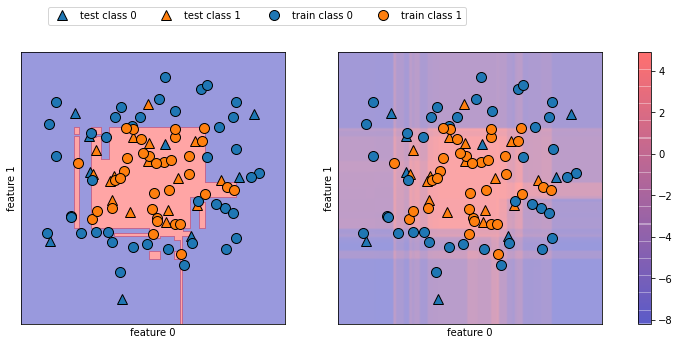

In [160]:
##### decision_function 可以再任意位置取值,这取决于模型参数
decision_function = gbrt.decision_function(Xtest)

print("descision function minimun :{:.2f}maximum:{:.2f}".format(np.min(decision_function),np.max(decision_function)))


### 由于可以任意缩放，因此decision_function的输出往往很难解释
fig,axes = plt.subplots(1,2,figsize=(13,5))
mglearn.tools.plot_2d_separator(gbrt,X,ax=axes[0],alpha=0.4,fill = True,cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt,X,ax=axes[1],alpha = 0.4,cm=mglearn.ReBl)

for ax in axes:
    # 画出训练点和测试点
    mglearn.discrete_scatter(Xtest[:,0],Xtest[:,1],ytest,markers="^",ax = ax)
    mglearn.discrete_scatter(Xtrain[:,0],Xtrain[:,1],ytrain,markers="o",ax=ax)
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")

cbar = plt.colorbar(scores_image,ax=axes.tolist())
axes[0].legend(["test class 0","test class 1 ","train class 0","train class 1"],ncol = 4,loc=[0.1,1.1])

In [163]:
##### 预测概率--predict_proba
# predict_proba 的输出是每个类别的概率,通常比decision_function 的输出跟容易理解 通常的形状(n_sqmples,2)

print("shape of probabilities :{}".format(gbrt.predict_proba(Xtest).shape))
print("predicted probabilites:\n{}".format(gbrt.predict_proba(Xtest[:6])))

shape of probabilities :(25, 2)
predicted probabilites:
[[0.01573626 0.98426374]
 [0.84575653 0.15424347]
 [0.98112869 0.01887131]
 [0.97407033 0.02592967]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


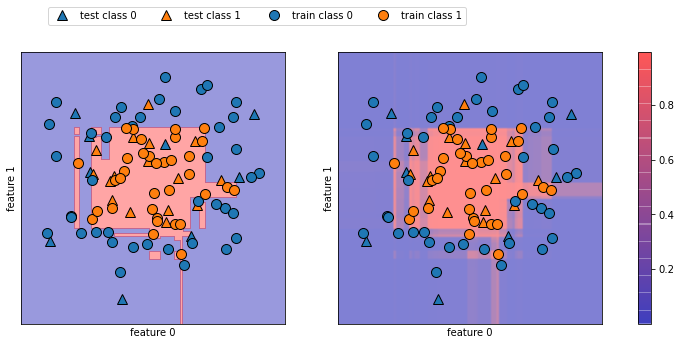

In [167]:
fig,axes = plt.subplots(1,2,figsize=(13,5))
mglearn.tools.plot_2d_separator(gbrt,X,ax=axes[0],alpha=0.4,fill=True,cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt,X,ax=axes[1],alpha = 0.5,cm=mglearn.ReBl,function = "predict_proba")

for ax in axes:
    mglearn.discrete_scatter(Xtest[:,0],Xtest[:,1],ytest,markers="^",ax=ax)
    mglearn.discrete_scatter(Xtrain[:,0],Xtrain[:,1],ytrain,markers="o",ax=ax)
    
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
    

cbar = plt.colorbar(scores_image,ax=axes.tolist())
axes[0].legend(["test class 0","test class 1 ","train class 0","train class 1"],ncol = 4,loc=[0.1,1.1])    

In [171]:
##### 多分类问题的不确定度
from sklearn.datasets import load_iris

iris = load_iris()
Xtrain,Xtest,ytrain,ytest = train_test_split(iris.data,iris.target,random_state = 42)

gbrt = GradientBoostingClassifier(learning_rate = 0.01,random_state = 0)
gbrt.fit(Xtrain,ytrain)

print("decision_function shape：{}".format(gbrt.decision_function(Xtrain).shape))
print("decision_function:\n{}".format(gbrt.decision_function(Xtest)[:6,:]))

decision_function shape：(112, 3)
decision_function:
[[-1.995715    0.04758267 -1.92720695]
 [ 0.06146394 -1.90755736 -1.92793758]
 [-1.99058203 -1.87637861  0.09686725]
 [-1.995715    0.04758267 -1.92720695]
 [-1.99730159 -0.13469108 -1.20341483]
 [ 0.06146394 -1.90755736 -1.92793758]]


In [178]:
print("Argmax of decision function:\n{}".format(np.argmax(gbrt.decision_function(Xtest),axis =1)))
print("predictions:\n{}".format(gbrt.predict(Xtest)))

print("prodicted probabilties:\n{}".format(gbrt.predict_proba(Xtest)[:6]))
print("sums:{}".format(gbrt.predict_proba(Xtest)[:6].sum(axis =1)))

#通过计算predict_proba的argmax来计算预测：
print("argmax of predict probablities:\n{}".format(np.argmax(gbrt.predict_proba(Xtest),axis=1)))
print("predoction:\n{}".format(gbrt.predict(Xtest)))

Argmax of decision function:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
prodicted probabilties:
[[0.10217718 0.78840034 0.10942248]
 [0.78347147 0.10936745 0.10716108]
 [0.09818072 0.11005864 0.79176065]
 [0.10217718 0.78840034 0.10942248]
 [0.10360005 0.66723901 0.22916094]
 [0.78347147 0.10936745 0.10716108]]
sums:[1. 1. 1. 1. 1. 1.]
argmax of predict probablities:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
predoction:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [185]:
# 统classes_来获得真实的属性名称
logreg = LogisticRegression()
named_target = iris.target_names[ytrain]

# 用iris数据集的类别名字表示每个目标值
logreg.fit(Xtrain,named_target)
print("unique classes in training data :{}".format(logreg.classes_))
print("predictions:{}".format(logreg.predict_proba(Xtest)[:10]))
argmax_dec_func = np.argmax(logreg.decision_function(Xtest),axis=1)
print("argmax of decision function:{}".format(argmax_dec_func[10]))
print("argmax combined with classes_:{}".format(logreg.classes_[argmax_dec_func][:10]))


unique classes in training data :['setosa' 'versicolor' 'virginica']
predictions:[[3.98546368e-03 8.22130675e-01 1.73883861e-01]
 [9.44175902e-01 5.58237879e-02 3.10136387e-07]
 [1.20890504e-08 1.82799179e-03 9.98171996e-01]
 [6.68179712e-03 7.87139247e-01 2.06178955e-01]
 [1.54224282e-03 7.69786608e-01 2.28671149e-01]
 [9.52618170e-01 4.73815678e-02 2.62163071e-07]
 [7.75359367e-02 9.06996363e-01 1.54677002e-02]
 [1.77954940e-04 1.58493509e-01 8.41328537e-01]
 [2.33019049e-03 7.75672873e-01 2.21996936e-01]
 [2.87125656e-02 9.44160935e-01 2.71264996e-02]]
argmax of decision function:2
argmax combined with classes_:['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']


##### 小结与展望
+ 最近邻：
  + 适用于小型数据集,很好的基准模型,很容易解释
+ 线性模型
  + 非常靠谱的首选算法,适用于非常大的数据集,也适用于高维数据
+ 朴素贝叶斯
  + 只适用于分类问题,比线性模型还要快,适用于非常大的数据集合高维数据,精度通常第一显示模型
+ 决策树
  + 决策很快，不需要数据缩放,可以可视化,很容易解释
+ 随机森铃
  + 几乎总比单棵决策树的表现要好,鲁棒性非常好,非常强大,不需要数据缩放,不适用于高维稀疏数据
+ 梯度决策树
  + 精度通常比随机森林.与随机森立相比,训练速度较慢,但预测速度更快,需要的内存更少,比随机森铃需要更多的参数调节
+ 支持向量机
  + 对于特征含义像是的中等大小的数据集和强大，需要数据缩放对参数敏感
+ 神经网络
  + 可以构建非常复杂的模型,特别是对于